In [34]:
import os 
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [35]:
nbadata=os.path.join('nba_hurt.csv')

In [36]:
nbadata_df=pd.read_csv(nbadata)
nbadata_df.head()

,Date,Team,name,Notes,year_start,year_end,position,height,weight,birth_date,college
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,6-9,258.0,"November 20, 1981",Duke University
1,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),2010.0,2016.0,F,6-9,240.0,"April 29, 1987",Arizona State University
2,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely),2002.0,2013.0,F-C,6-11,245.0,"May 2, 1980",University of Notre Dame
3,2010-10-12,Bucks,Darington Hobson,surgery on left hip (out for season),2012.0,2012.0,G,6-7,210.0,"September 29, 1987",University of New Mexico
4,2010-10-12,Kings,Samuel Dalembert,strained left groin (out indefinitely),2002.0,2015.0,C,6-11,255.0,"May 10, 1981",Seton Hall University


In [37]:
nbadata_df[["height", "weight","Notes"]].head()

,height,weight,Notes
0,6-9,258.0,fractured bone in right pinky finger (out inde...
1,6-9,240.0,torn ACL in right knee (out indefinitely)
2,6-11,245.0,strained lower back (out indefinitely)
3,6-7,210.0,surgery on left hip (out for season)
4,6-11,255.0,strained left groin (out indefinitely)


In [38]:
#splitting height feet and inches to convert each to meters, then later adding them together

# new data frame with split value columns 
#new = data["Name"].str.split(" ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
#data["First Name"]= new[0] 
  
# making separate last name column from new data frame 
#data["Last Name"]= new[1] 
  
# Dropping old Name columns 
#data.drop(columns =["Name"], inplace = True) 
  
# df display 
#data 

heightsplit=nbadata_df["height"].str.split("-", n=1, expand=True)
nbadata_df["feet"]=heightsplit[0]
nbadata_df["inches"]=heightsplit[1]
nbadata_df.drop(columns=["height"], inplace=True)
nbadata_df.head()


,Date,Team,name,Notes,year_start,year_end,position,weight,birth_date,college,feet,inches
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,6,9
1,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),2010.0,2016.0,F,240.0,"April 29, 1987",Arizona State University,6,9
2,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely),2002.0,2013.0,F-C,245.0,"May 2, 1980",University of Notre Dame,6,11
3,2010-10-12,Bucks,Darington Hobson,surgery on left hip (out for season),2012.0,2012.0,G,210.0,"September 29, 1987",University of New Mexico,6,7
4,2010-10-12,Kings,Samuel Dalembert,strained left groin (out indefinitely),2002.0,2015.0,C,255.0,"May 10, 1981",Seton Hall University,6,11


In [39]:
#tidy dataframe to data of interest
nbadata_df[["feet", "inches", "weight","Notes"]].head()


,feet,inches,weight,Notes
0,6,9,258.0,fractured bone in right pinky finger (out inde...
1,6,9,240.0,torn ACL in right knee (out indefinitely)
2,6,11,245.0,strained lower back (out indefinitely)
3,6,7,210.0,surgery on left hip (out for season)
4,6,11,255.0,strained left groin (out indefinitely)


In [40]:
#convert feet to integer, convert feet to inches
nbadata_df['feets']=(nbadata_df['feet'].apply(int)*12)+nbadata_df["inches"].apply(int)
#nbadata_df=nbadata_df["feet"].mul(12)
nbadata_df.head()

,Date,Team,name,Notes,year_start,year_end,position,weight,birth_date,college,feet,inches,feets
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,6,9,81
1,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),2010.0,2016.0,F,240.0,"April 29, 1987",Arizona State University,6,9,81
2,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely),2002.0,2013.0,F-C,245.0,"May 2, 1980",University of Notre Dame,6,11,83
3,2010-10-12,Bucks,Darington Hobson,surgery on left hip (out for season),2012.0,2012.0,G,210.0,"September 29, 1987",University of New Mexico,6,7,79
4,2010-10-12,Kings,Samuel Dalembert,strained left groin (out indefinitely),2002.0,2015.0,C,255.0,"May 10, 1981",Seton Hall University,6,11,83


In [41]:
#nbadata_df[["feets", "weight","Notes"]].head()

nbadata_df['kilos']=nbadata_df['weight'].divide(2.2)
#nbadata_df.head()
#converting weight to kilograms
#weightmetric=nbadata_df["weight"].divide(2.2)
#weightmetric.head()        

#metricheight=(nbadata_df["feets"].divide(39.97)), (nbadata_df["feets"].multiply["feets"])
#metricheight=(nbadata_df["feets"].divide(39.97)), (nbadata_df["feets"].sqr)
nbadata_df["metricheight"]=(nbadata_df["feets"].divide(39.97)) **2
#, (nbadata_df["feets"]**2)
nbadata_df.head()

,Date,Team,name,Notes,year_start,year_end,position,weight,birth_date,college,feet,inches,feets,kilos,metricheight
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,6,9,81,117.272727,4.106783
1,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),2010.0,2016.0,F,240.0,"April 29, 1987",Arizona State University,6,9,81,109.090909,4.106783
2,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely),2002.0,2013.0,F-C,245.0,"May 2, 1980",University of Notre Dame,6,11,83,111.363636,4.312091
3,2010-10-12,Bucks,Darington Hobson,surgery on left hip (out for season),2012.0,2012.0,G,210.0,"September 29, 1987",University of New Mexico,6,7,79,95.454545,3.906483
4,2010-10-12,Kings,Samuel Dalembert,strained left groin (out indefinitely),2002.0,2015.0,C,255.0,"May 10, 1981",Seton Hall University,6,11,83,115.909091,4.312091


In [42]:
tidynbadata_df=nbadata_df.rename(columns={"metricheight": "Metric Height", "kilos":"Weight in Kilos"})
tidynbadata_df[["Metric Height", "Weight in Kilos", "Notes"]].head()

,Metric Height,Weight in Kilos,Notes
0,4.106783,117.272727,fractured bone in right pinky finger (out inde...
1,4.106783,109.090909,torn ACL in right knee (out indefinitely)
2,4.312091,111.363636,strained lower back (out indefinitely)
3,3.906483,95.454545,surgery on left hip (out for season)
4,4.312091,115.909091,strained left groin (out indefinitely)


In [43]:
#tidynbadata_df["BMI"]=(tidynbadata_df["Metric Height-sqr"]/["Weight in Kilos])
tidynbadata_df["BMI"]=tidynbadata_df["Weight in Kilos"]/tidynbadata_df["Metric Height"]
tidynbadata_df.head()
#columns_to_divide = ['open', 'close']
#df[columns_to_divide] = df[columns_to_divide] / df['prev']

,Date,Team,name,Notes,year_start,year_end,position,weight,birth_date,college,feet,inches,feets,Weight in Kilos,Metric Height,BMI
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,6,9,81,117.272727,4.106783,28.555863
1,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),2010.0,2016.0,F,240.0,"April 29, 1987",Arizona State University,6,9,81,109.090909,4.106783,26.563593
2,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely),2002.0,2013.0,F-C,245.0,"May 2, 1980",University of Notre Dame,6,11,83,111.363636,4.312091,25.825903
3,2010-10-12,Bucks,Darington Hobson,surgery on left hip (out for season),2012.0,2012.0,G,210.0,"September 29, 1987",University of New Mexico,6,7,79,95.454545,3.906483,24.434909
4,2010-10-12,Kings,Samuel Dalembert,strained left groin (out indefinitely),2002.0,2015.0,C,255.0,"May 10, 1981",Seton Hall University,6,11,83,115.909091,4.312091,26.880021


In [44]:
tidynbadata_df=tidynbadata_df.round(1)
tidynbadata_df[["Metric Height", "Weight in Kilos", "BMI", "Notes"]].head()

,Metric Height,Weight in Kilos,BMI,Notes
0,4.1,117.3,28.6,fractured bone in right pinky finger (out inde...
1,4.1,109.1,26.6,torn ACL in right knee (out indefinitely)
2,4.3,111.4,25.8,strained lower back (out indefinitely)
3,3.9,95.5,24.4,surgery on left hip (out for season)
4,4.3,115.9,26.9,strained left groin (out indefinitely)


In [45]:
bmis=tidynbadata_df["BMI"].value_counts()
bmis

24.5    343
25.9    261
25.2    253
25.8    246
23.9    245
25.7    239
26.8    216
24.4    209
26.3    196
24.3    160
26.2    159
27.0    158
26.0    152
27.3    151
27.1    145
26.1    127
24.7    112
26.4    109
24.8    109
26.6    107
23.2    107
27.7    105
25.1    105
25.6    105
24.9    102
22.7     99
27.2     96
26.9     94
27.9     94
26.5     93
       ... 
31.0     18
28.4     17
27.6     17
32.0     16
32.7     13
29.0     13
23.1     12
23.6     12
31.2     10
23.5      9
22.4      7
31.4      6
20.9      5
28.0      5
23.7      5
21.5      5
30.4      4
30.3      4
29.4      4
29.1      3
29.7      3
29.5      3
29.2      3
20.8      3
21.0      2
21.1      1
21.9      1
32.5      1
21.3      1
22.5      1
Name: BMI, Length: 85, dtype: int64

In [46]:
tidynbadata_df["BMI"].max()

32.7

In [47]:
tidynbadata_df["BMI"].min()

20.8

In [48]:
#binning BMIs for histogram
bins=[0,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31,31.5,32,32.5,33,33.5]
#0, 21.99, 23.99, 25.99, 27.99, 29.99, 31.99, 35]
binnames=["0-21", "21-21.5", "21.5-22", "22-22.5", "22.5-23", "23-23.5", "23.5-24", "24-24.5", 
          "24.5-25", "25-25.5", "25.5-26", "26-26.5", "26.5-27", "27-27.5", "27.5-28", "28-28.5", 
          "28.5-29", "29-29.5", "29.5-30", "30-30.5", "30.5-31", "31-31.5", "31.5-32", "32-32.5", "32.5-33", "33-33.5"]
#Under 21", "22-23", "24-25", "26-27", "28-29", "30-31", "32+"]
tidynbadata_df["BMI ranges"]=pd.cut(tidynbadata_df["BMI"], bins, labels=binnames)
bmibins=tidynbadata_df["BMI ranges"].value_counts()

In [49]:
bmibins

25.5-26    1003
24-24.5     787
26-26.5     684
26.5-27     604
25-25.5     587
27-27.5     513
24.5-25     461
23.5-24     404
27.5-28     299
23-23.5     220
28-28.5     199
28.5-29     131
22.5-23     120
22-22.5      97
30.5-31      18
31-31.5      16
31.5-32      16
29-29.5      13
32.5-33      13
0-21         10
30-30.5       8
21-21.5       7
29.5-30       3
32-32.5       1
21.5-22       1
33-33.5       0
Name: BMI ranges, dtype: int64

In [50]:
#add bin results to df in ascending order
bmibins.to_frame("BMI counts")
sortedbmibins=bmibins.sort_index()
sortedbmibins


0-21         10
21-21.5       7
21.5-22       1
22-22.5      97
22.5-23     120
23-23.5     220
23.5-24     404
24-24.5     787
24.5-25     461
25-25.5     587
25.5-26    1003
26-26.5     684
26.5-27     604
27-27.5     513
27.5-28     299
28-28.5     199
28.5-29     131
29-29.5      13
29.5-30       3
30-30.5       8
30.5-31      18
31-31.5      16
31.5-32      16
32-32.5       1
32.5-33      13
33-33.5       0
Name: BMI ranges, dtype: int64

In [51]:
tidynbadata_df.head()

,Date,Team,name,Notes,year_start,year_end,position,weight,birth_date,college,feet,inches,feets,Weight in Kilos,Metric Height,BMI,BMI ranges
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,6,9,81,117.3,4.1,28.6,28.5-29
1,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),2010.0,2016.0,F,240.0,"April 29, 1987",Arizona State University,6,9,81,109.1,4.1,26.6,26.5-27
2,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely),2002.0,2013.0,F-C,245.0,"May 2, 1980",University of Notre Dame,6,11,83,111.4,4.3,25.8,25.5-26
3,2010-10-12,Bucks,Darington Hobson,surgery on left hip (out for season),2012.0,2012.0,G,210.0,"September 29, 1987",University of New Mexico,6,7,79,95.5,3.9,24.4,24-24.5
4,2010-10-12,Kings,Samuel Dalembert,strained left groin (out indefinitely),2002.0,2015.0,C,255.0,"May 10, 1981",Seton Hall University,6,11,83,115.9,4.3,26.9,26.5-27


In [67]:
bmi_vs_pop_df=tidynbadata_df.groupby(["BMI ranges"])[['name']].count()

bmi_vs_pop_df = bmi_vs_pop_df.sort_values('name',ascending=False)
bmi_vs_pop_df.reset_index()

,BMI ranges,name
0,25.5-26,1003
1,24-24.5,787
2,26-26.5,684
3,26.5-27,604
4,25-25.5,587
5,27-27.5,513
6,24.5-25,461
7,23.5-24,404
8,27.5-28,299
9,23-23.5,220


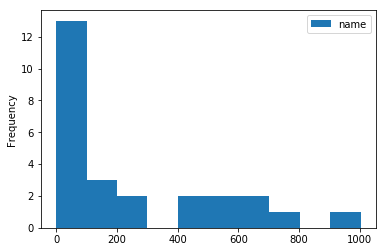

In [64]:
bmihist=bmi_vs_pop_df.plot.hist()

In [20]:
injuries=os.path.join('nba_hurt2.csv')
injuries_df=pd.read_csv(injuries)
injuries_df.head()

,Unnamed: 0,Date,Team,name,Notes,year_start,year_end,position,height,weight,birth_date,college,Strains/Sprains,Dislocations,Arm Fractures,Leg Fractures,Injury Type,Estimated Medical Costs (2012)
0,0,10/03/10,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003,2015,F-C,9-Jun,258,20-Nov-81,Duke University,False,False,True,False,Arm Fracture,7666
1,1,10/08/10,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),2010,2016,F,9-Jun,240,29-Apr-87,Arizona State University,False,False,False,False,No Index,No Index
2,2,10/08/10,Nets,Troy Murphy,strained lower back (out indefinitely),2002,2013,F-C,11-Jun,245,2-May-80,University of Notre Dame,True,False,False,False,Strain/Sprain,3175
3,3,10/12/10,Bucks,Darington Hobson,surgery on left hip (out for season),2012,2012,G,7-Jun,210,29-Sep-87,University of New Mexico,False,False,False,False,No Index,No Index
4,4,10/12/10,Kings,Samuel Dalembert,strained left groin (out indefinitely),2002,2015,C,11-Jun,255,10-May-81,Seton Hall University,True,False,False,False,Strain/Sprain,3175


In [21]:
mergednbadata=pd.merge(tidynbadata_df, injuries_df, on="name", how="outer")
mergednbadata.head()

,Date_x,Team_x,name,Notes_x,year_start_x,year_end_x,position_x,weight_x,birth_date_x,college_x,...,height,weight_y,birth_date_y,college_y,Strains/Sprains,Dislocations,Arm Fractures,Leg Fractures,Injury Type,Estimated Medical Costs (2012)
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,...,9-Jun,258,20-Nov-81,Duke University,False,False,True,False,Arm Fracture,7666
1,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,...,9-Jun,258,20-Nov-81,Duke University,True,False,False,False,Strain/Sprain,3175
2,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,...,9-Jun,258,20-Nov-81,Duke University,True,False,False,False,Strain/Sprain,3175
3,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,...,9-Jun,258,20-Nov-81,Duke University,True,False,False,False,Strain/Sprain,3175
4,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,...,9-Jun,258,20-Nov-81,Duke University,True,False,False,False,Strain/Sprain,3175


In [22]:
mergednbadata['name'].nunique()

591

In [23]:
mergednbadata.head()

,Date_x,Team_x,name,Notes_x,year_start_x,year_end_x,position_x,weight_x,birth_date_x,college_x,...,height,weight_y,birth_date_y,college_y,Strains/Sprains,Dislocations,Arm Fractures,Leg Fractures,Injury Type,Estimated Medical Costs (2012)
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,...,9-Jun,258,20-Nov-81,Duke University,False,False,True,False,Arm Fracture,7666
1,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,...,9-Jun,258,20-Nov-81,Duke University,True,False,False,False,Strain/Sprain,3175
2,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,...,9-Jun,258,20-Nov-81,Duke University,True,False,False,False,Strain/Sprain,3175
3,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,...,9-Jun,258,20-Nov-81,Duke University,True,False,False,False,Strain/Sprain,3175
4,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,...,9-Jun,258,20-Nov-81,Duke University,True,False,False,False,Strain/Sprain,3175


In [25]:
#mergednbadata=mergednbadata.drop(["Unnamed: 0", "Date_y", "Team_y", "Notes_y"], axis=1)
#data = data.drop(["Y2001", "Y2002", "Y2003"], axis=1)
#mergednbadata.dtypes
mergednbadata.head()
mergednbadata.to_csv("nba_hurtsKW2.csv", index=False, header=True)

In [26]:
realdata=os.path.join('nba_hurtsKW2.csv')
realdata_df=pd.read_csv(realdata)
realdata_df.head()

,Date_x,Team_x,name,Notes_x,year_start_x,year_end_x,position_x,weight_x,birth_date_x,college_x,...,height,weight_y,birth_date_y,college_y,Strains/Sprains,Dislocations,Arm Fractures,Leg Fractures,Injury Type,Estimated Medical Costs (2012)
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,...,9-Jun,258,20-Nov-81,Duke University,False,False,True,False,Arm Fracture,7666
1,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,...,9-Jun,258,20-Nov-81,Duke University,True,False,False,False,Strain/Sprain,3175
2,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,...,9-Jun,258,20-Nov-81,Duke University,True,False,False,False,Strain/Sprain,3175
3,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,...,9-Jun,258,20-Nov-81,Duke University,True,False,False,False,Strain/Sprain,3175
4,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2003.0,2015.0,F-C,258.0,"November 20, 1981",Duke University,...,9-Jun,258,20-Nov-81,Duke University,True,False,False,False,Strain/Sprain,3175


In [29]:
sprains_df=realdata_df.groupby(["BMI ranges",'Strains/Sprains'])[['Strains/Sprains']].count()
sprains_df

Strains/Sprains
BMI ranges Strains/Sprains                 
0-21       False                         23
           True                          15
21-21.5    False                         22
           True                           5
21.5-22    False                          1
22-22.5    False                       1991
           True                         158
22.5-23    False                       1905
           True                         505
23-23.5    False                       2460
           True                        1442
23.5-24    False                       7872
           True                        1670
24-24.5    False                      13870
           True                        7289
24.5-25    False                       6276
           True                        2527
25-25.5    False                      11933
           True                        4002
25.5-26    False                      14628
           True                        9685
26-26.5    False                      12008
           True                        3826
26.5-27    False                      14393
           True                        4791
27-27.5    False                      16160
           True                        4631
27.5-28    False                       3962
           True                        1201
28-28.5    False                       2685
           True                        1948
28.5-29    False                       1723
           True                         476
29-29.5    False                         32
           True                           7
29.5-30    False                          3
           True                           2
30-30.5    False                         16
           True                          10
30.5-31    False                        324
31-31.5    False                         80
           True                          56
31.5-32    False                        112
           True                         144
32-32.5    False                          1
32.5-33    False                        169

In [30]:
dislocations_df=realdata_df.groupby(["BMI ranges",'Dislocations'])[['Dislocations']].count()
dislocations_df


Dislocations
BMI ranges Dislocations              
0-21       False                   38
21-21.5    False                   27
21.5-22    False                    1
22-22.5    False                 2142
           True                     7
22.5-23    False                 2410
23-23.5    False                 3895
           True                     7
23.5-24    False                 9542
24-24.5    False                21159
24.5-25    False                 8778
           True                    25
25-25.5    False                15935
25.5-26    False                24269
           True                    44
26-26.5    False                15711
           True                   123
26.5-27    False                19158
           True                    26
27-27.5    False                20791
27.5-28    False                 5083
           True                    80
28-28.5    False                 4633
28.5-29    False                 2019
           True                   180
29-29.5    False                   39
29.5-30    False                    5
30-30.5    False                   26
30.5-31    False                  324
31-31.5    False                  136
31.5-32    False                  256
32-32.5    False                    1
32.5-33    False                  169

In [31]:
armfractures_df=realdata_df.groupby(["BMI ranges",'Arm Fractures'])[['Arm Fractures']].count()
armfractures_df

Arm Fractures
BMI ranges Arm Fractures               
0-21       False                     38
21-21.5    False                     27
21.5-22    False                      1
22-22.5    False                   2149
22.5-23    False                   2410
23-23.5    False                   3865
           True                      37
23.5-24    False                   9536
           True                       6
24-24.5    False                  21150
           True                       9
24.5-25    False                   8735
           True                      68
25-25.5    False                  15849
           True                      86
25.5-26    False                  24221
           True                      92
26-26.5    False                  15800
           True                      34
26.5-27    False                  18834
           True                     350
27-27.5    False                  17983
           True                    2808
27.5-28    False                   5085
           True                      78
28-28.5    False                   4633
28.5-29    False                   2184
           True                      15
29-29.5    False                     39
29.5-30    False                      5
30-30.5    False                     26
30.5-31    False                    324
31-31.5    False                    136
31.5-32    False                    256
32-32.5    False                      1
32.5-33    False                    169

In [32]:
legfractures_df=realdata_df.groupby(["BMI ranges",'Leg Fractures'])[['Leg Fractures']].count()
legfractures_df

Leg Fractures
BMI ranges Leg Fractures               
0-21       False                     38
21-21.5    False                     27
21.5-22    False                      1
22-22.5    False                   2149
22.5-23    False                   2410
23-23.5    False                   3865
           True                      37
23.5-24    False                   9533
           True                       9
24-24.5    False                  21150
           True                       9
24.5-25    False                   8801
           True                       2
25-25.5    False                  15896
           True                      39
25.5-26    False                  24184
           True                     129
26-26.5    False                  15797
           True                      37
26.5-27    False                  19032
           True                     152
27-27.5    False                  20791
27.5-28    False                   5147
           True                      16
28-28.5    False                   4626
           True                       7
28.5-29    False                   2199
29-29.5    False                     39
29.5-30    False                      5
30-30.5    False                     26
30.5-31    False                    324
31-31.5    False                    136
31.5-32    False                    256
32-32.5    False                      1
32.5-33    False                    169